# Dimensionnement

Hypothèses:
- IRT = 4 personnes + 2 PhD
- Industriels = apport cash + (éventuellement) MaD
- projet classique recherche en propre 36 mois,
- F_2030 = 40% coûts directs
- Fichier de montage MAJ 25/09/2025

Scenarii:
- 1/ Baseline : apport -hors rachat MaD- nécessaire pour financer l'équipe
- 2/ Avec MaD industriels - part de cash nécessaire pour équilibrer les comptes avec notre mode de calcul actuel

## Données

In [1]:
import numpy as np
import matplotlib.pyplot as plt

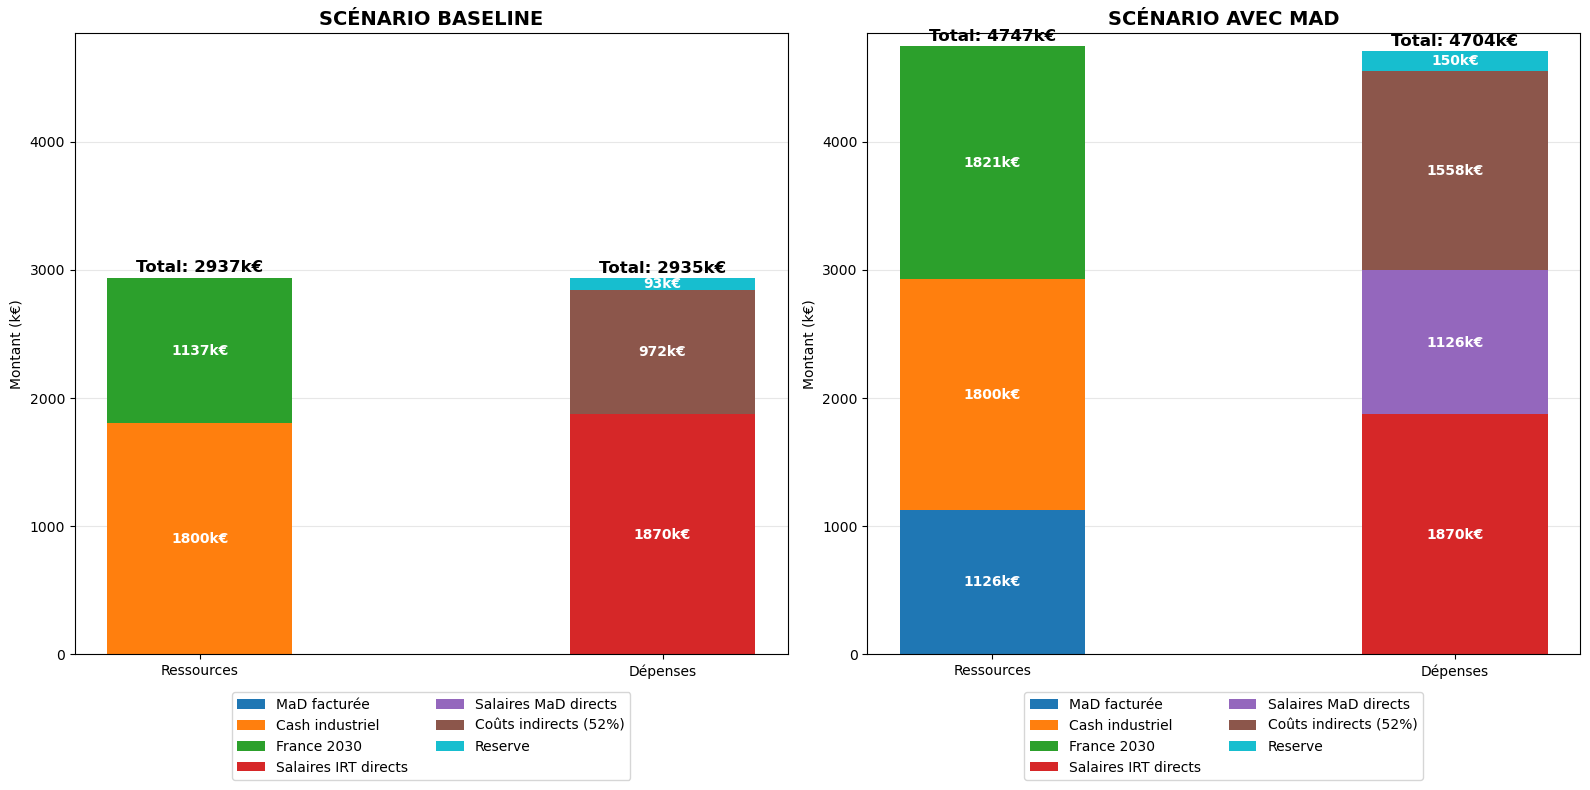

In [5]:
# Create two plots side by side - one for each scenario
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Data for scenarios
categories = ['Ressources', 'Dépenses']

# Baseline scenario data
baseline_mad_facture = [0, 0]  # No MaD billing in baseline
baseline_cash_ind = [1800, 0]   # Cash only in resources
baseline_france_2030 = [1137, 0]  # France 2030 only in resources
baseline_salaires_irt = [0, 1870]  # IRT salaries only in expenses
baseline_salaires_mad = [0, 0]    # No MaD salaries in baseline
baseline_indirects = [0, 972]     # Indirect costs only in expenses
baseline_reserve = [0, 93]       # Reserve only in expenses

# Avec MaD scenario data
mad_mad_facture = [1126, 0]     # MaD billing only in resources
mad_cash_ind = [1800, 0]        # Cash only in resources
mad_france_2030 = [1821, 0]     # France 2030 only in resources
mad_salaires_irt = [0, 1870]    # IRT salaries only in expenses
mad_salaires_mad = [0, 1126]    # MaD salaries only in expenses
mad_indirects = [0, 1558]       # Indirect costs only in expenses
mad_reserve = [0, 150]         # Reserve only in expenses

width = 0.4

# BASELINE SCENARIO (left plot)
# Resources stack
bars1_1 = ax1.bar(categories, baseline_mad_facture, width, label='MaD facturée', color='#1f77b4')
bars1_2 = ax1.bar(categories, baseline_cash_ind, width, bottom=baseline_mad_facture, 
                  label='Cash industriel', color='#ff7f0e')
bars1_3 = ax1.bar(categories, baseline_france_2030, width, 
                  bottom=np.array(baseline_mad_facture) + np.array(baseline_cash_ind), 
                  label='France 2030', color='#2ca02c')

# Expenses stack
bars1_4 = ax1.bar(categories, baseline_salaires_irt, width, 
                  bottom=np.array(baseline_mad_facture) + np.array(baseline_cash_ind) + np.array(baseline_france_2030),
                  label='Salaires IRT directs', color='#d62728')
bars1_5 = ax1.bar(categories, baseline_salaires_mad, width, 
                  bottom=np.array(baseline_mad_facture) + np.array(baseline_cash_ind) + np.array(baseline_france_2030) + np.array(baseline_salaires_irt),
                  label='Salaires MaD directs', color='#9467bd')
bars1_6 = ax1.bar(categories, baseline_indirects, width, 
                  bottom=np.array(baseline_mad_facture) + np.array(baseline_cash_ind) + np.array(baseline_france_2030) + np.array(baseline_salaires_irt) + np.array(baseline_salaires_mad),
                  label='Coûts indirects (52%)', color='#8c564b')
bars1_7 = ax1.bar(categories, baseline_reserve, width, 
                  bottom=np.array(baseline_mad_facture) + np.array(baseline_cash_ind) + np.array(baseline_france_2030) + np.array(baseline_salaires_irt) + np.array(baseline_salaires_mad) + np.array(baseline_indirects),
                  label='Reserve', color='#17becf')

# Calculate totals for baseline
baseline_totals = [
    baseline_mad_facture[0] + baseline_cash_ind[0] + baseline_france_2030[0],  # Resources total
    baseline_salaires_irt[1] + baseline_salaires_mad[1] + baseline_indirects[1] + baseline_reserve[1]  # Expenses total
]

# Add value labels for baseline
# Resources
if baseline_cash_ind[0] > 0:
    ax1.text(0, baseline_mad_facture[0] + baseline_cash_ind[0]/2, f'{baseline_cash_ind[0]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if baseline_france_2030[0] > 0:
    y_pos = baseline_mad_facture[0] + baseline_cash_ind[0] + baseline_france_2030[0]/2
    ax1.text(0, y_pos, f'{baseline_france_2030[0]}k€', 
            ha='center', va='center', fontweight='bold', color='white')

# Expenses
if baseline_salaires_irt[1] > 0:
    base_height = baseline_mad_facture[1] + baseline_cash_ind[1] + baseline_france_2030[1]
    ax1.text(1, base_height + baseline_salaires_irt[1]/2, f'{baseline_salaires_irt[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if baseline_indirects[1] > 0:
    base_height = baseline_mad_facture[1] + baseline_cash_ind[1] + baseline_france_2030[1] + baseline_salaires_irt[1] + baseline_salaires_mad[1]
    ax1.text(1, base_height + baseline_indirects[1]/2, f'{baseline_indirects[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if baseline_reserve[1] > 0:
    base_height = baseline_mad_facture[1] + baseline_cash_ind[1] + baseline_france_2030[1] + baseline_salaires_irt[1] + baseline_salaires_mad[1] + baseline_indirects[1]
    ax1.text(1, base_height + baseline_reserve[1]/2, f'{baseline_reserve[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')

# Add total labels for baseline
for i, total in enumerate(baseline_totals):
    ax1.text(i, total + 20, f'Total: {total}k€', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# AVEC MAD SCENARIO (right plot)
# Resources and expenses stacks
bars2_1 = ax2.bar(categories, mad_mad_facture, width, label='MaD facturée', color='#1f77b4')
bars2_2 = ax2.bar(categories, mad_cash_ind, width, bottom=mad_mad_facture, 
                  label='Cash industriel', color='#ff7f0e')
bars2_3 = ax2.bar(categories, mad_france_2030, width, 
                  bottom=np.array(mad_mad_facture) + np.array(mad_cash_ind), 
                  label='France 2030', color='#2ca02c')
bars2_4 = ax2.bar(categories, mad_salaires_irt, width, 
                  bottom=np.array(mad_mad_facture) + np.array(mad_cash_ind) + np.array(mad_france_2030),
                  label='Salaires IRT directs', color='#d62728')
bars2_5 = ax2.bar(categories, mad_salaires_mad, width, 
                  bottom=np.array(mad_mad_facture) + np.array(mad_cash_ind) + np.array(mad_france_2030) + np.array(mad_salaires_irt),
                  label='Salaires MaD directs', color='#9467bd')
bars2_6 = ax2.bar(categories, mad_indirects, width, 
                  bottom=np.array(mad_mad_facture) + np.array(mad_cash_ind) + np.array(mad_france_2030) + np.array(mad_salaires_irt) + np.array(mad_salaires_mad),
                  label='Coûts indirects (52%)', color='#8c564b')
bars2_7 = ax2.bar(categories, mad_reserve, width, 
                  bottom=np.array(mad_mad_facture) + np.array(mad_cash_ind) + np.array(mad_france_2030) + np.array(mad_salaires_irt) + np.array(mad_salaires_mad) + np.array(mad_indirects),
                  label='Reserve', color='#17becf')

# Calculate totals for avec MaD
mad_totals = [
    mad_mad_facture[0] + mad_cash_ind[0] + mad_france_2030[0],  # Resources total
    mad_salaires_irt[1] + mad_salaires_mad[1] + mad_indirects[1] + mad_reserve[1]  # Expenses total
]

# Add value labels for avec MaD
# Resources
if mad_mad_facture[0] > 0:
    ax2.text(0, mad_mad_facture[0]/2, f'{mad_mad_facture[0]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if mad_cash_ind[0] > 0:
    y_pos = mad_mad_facture[0] + mad_cash_ind[0]/2
    ax2.text(0, y_pos, f'{mad_cash_ind[0]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if mad_france_2030[0] > 0:
    y_pos = mad_mad_facture[0] + mad_cash_ind[0] + mad_france_2030[0]/2
    ax2.text(0, y_pos, f'{mad_france_2030[0]}k€', 
            ha='center', va='center', fontweight='bold', color='white')

# Expenses
if mad_salaires_irt[1] > 0:
    base_height = mad_mad_facture[1] + mad_cash_ind[1] + mad_france_2030[1]
    ax2.text(1, base_height + mad_salaires_irt[1]/2, f'{mad_salaires_irt[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if mad_salaires_mad[1] > 0:
    base_height = mad_mad_facture[1] + mad_cash_ind[1] + mad_france_2030[1] + mad_salaires_irt[1]
    ax2.text(1, base_height + mad_salaires_mad[1]/2, f'{mad_salaires_mad[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if mad_indirects[1] > 0:
    base_height = mad_mad_facture[1] + mad_cash_ind[1] + mad_france_2030[1] + mad_salaires_irt[1] + mad_salaires_mad[1]
    ax2.text(1, base_height + mad_indirects[1]/2, f'{mad_indirects[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')
if mad_reserve[1] > 0:
    base_height = mad_mad_facture[1] + mad_cash_ind[1] + mad_france_2030[1] + mad_salaires_irt[1] + mad_salaires_mad[1] + mad_indirects[1]
    ax2.text(1, base_height + mad_reserve[1]/2, f'{mad_reserve[1]}k€', 
            ha='center', va='center', fontweight='bold', color='white')

# Add total labels for avec MaD
for i, total in enumerate(mad_totals):
    ax2.text(i, total + 20, f'Total: {total}k€', 
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Customize both charts
max_y = max(max(baseline_totals), max(mad_totals)) + 100

ax1.set_title('SCÉNARIO BASELINE', fontweight='bold', fontsize=14)
ax1.set_ylabel('Montant (k€)')
ax1.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_axisbelow(True)
ax1.set_ylim(0, max_y)

ax2.set_title('SCÉNARIO AVEC MAD', fontweight='bold', fontsize=14)
ax2.set_ylabel('Montant (k€)')
ax2.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=2)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_axisbelow(True)
ax2.set_ylim(0, max_y)

plt.tight_layout()
plt.show()